In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
df = pd.read_csv('diabetes.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype
---  ------                 --------------   -----
 0   Diabetes               253680 non-null  int64
 1   HighBP                 253680 non-null  int64
 2   HighChol               253680 non-null  int64
 3   BMI                    253680 non-null  int64
 4   Smoker                 253680 non-null  int64
 5   Stroke                 253680 non-null  int64
 6   Myocardial             253680 non-null  int64
 7   PhysActivity           253680 non-null  int64
 8   Fruit                  253680 non-null  int64
 9   Vegetables             253680 non-null  int64
 10  HeavyDrinker           253680 non-null  int64
 11  HasHealthcare          253680 non-null  int64
 12  NotAbleToAffordDoctor  253680 non-null  int64
 13  GeneralHealth          253680 non-null  int64
 14  MentalHealth           253680 non-null  int64
 15  PhysicalHealth   

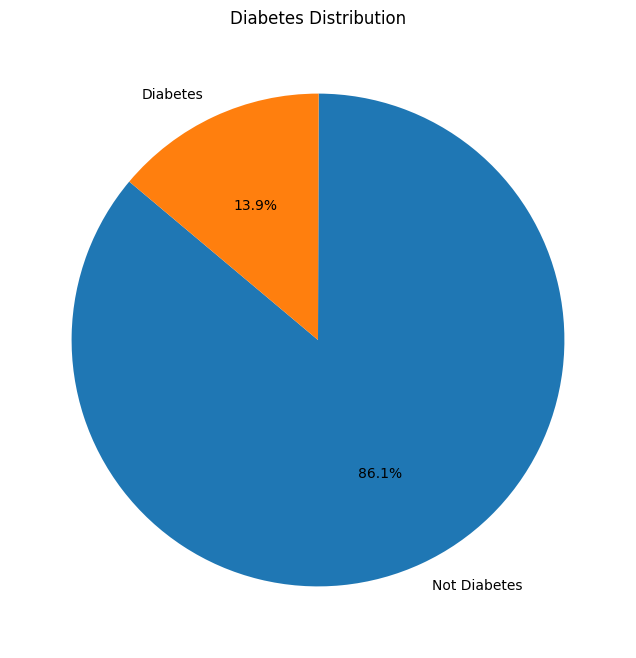

,Diabetes,HighBP,HighChol,BMI,Smoker,Stroke,Myocardial,PhysActivity,Fruit,Vegetables,...,NotAbleToAffordDoctor,GeneralHealth,MentalHealth,PhysicalHealth,HardToClimbStairs,BiologicalSex,AgeBracket,EducationBracket,IncomeBracket,Zodiac
0,0,1,1,40,1,0,0,0,0,1,...,0,5,18,15,1,1,9,4,3,10
1,0,0,0,25,1,0,0,1,0,0,...,1,3,0,0,0,1,7,6,1,11
2,0,1,1,28,0,0,0,0,1,0,...,1,5,30,30,1,1,9,4,8,2
3,0,1,0,27,0,0,0,1,1,1,...,0,2,0,0,0,1,11,3,6,11
4,0,1,1,24,0,0,0,1,1,1,...,0,2,3,0,0,1,11,5,4,8


In [2]:
diabetes_count = df['Diabetes'].value_counts()
plt.figure(figsize = (8,8))
plt.pie(diabetes_count, labels = ['Not Diabetes','Diabetes'], autopct = '%1.1f%%', startangle=140)
plt.title('Diabetes Distribution')
plt.show()
df.head()

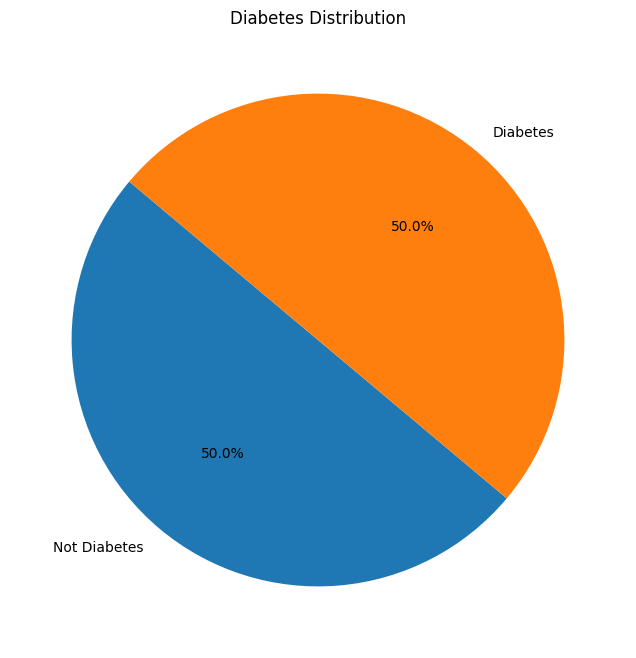

,Diabetes,HighBP,HighChol,BMI,Smoker,Stroke,Myocardial,PhysActivity,Fruit,Vegetables,...,NotAbleToAffordDoctor,GeneralHealth,MentalHealth,PhysicalHealth,HardToClimbStairs,BiologicalSex,AgeBracket,EducationBracket,IncomeBracket,Zodiac
0,0,1,1,40,1,0,0,0,0,1,...,0,5,18,15,1,1,9,4,3,10
1,0,0,0,25,1,0,0,1,0,0,...,1,3,0,0,0,1,7,6,1,11
2,0,1,1,28,0,0,0,0,1,0,...,1,5,30,30,1,1,9,4,8,2
3,0,1,0,27,0,0,0,1,1,1,...,0,2,0,0,0,1,11,3,6,11
4,0,1,1,24,0,0,0,1,1,1,...,0,2,3,0,0,1,11,5,4,8


In [3]:
from sklearn.utils import resample

majority = df[df.Diabetes == 0]
minority = df[df.Diabetes == 1]

majority_undersampled = resample(majority, replace = False, n_samples = len(minority),random_state = 13)
balanced_data = pd.concat([majority_undersampled, minority])

diabetes_count = balanced_data['Diabetes'].value_counts()
plt.figure(figsize = (8,8))
plt.pie(diabetes_count, labels = ['Not Diabetes','Diabetes'], autopct = '%1.1f%%', startangle=140)
plt.title('Diabetes Distribution')
plt.show()
df.head()

In [4]:
X = balanced_data.drop('Diabetes', axis = 1)
y = balanced_data['Diabetes']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 13)

# Question 1

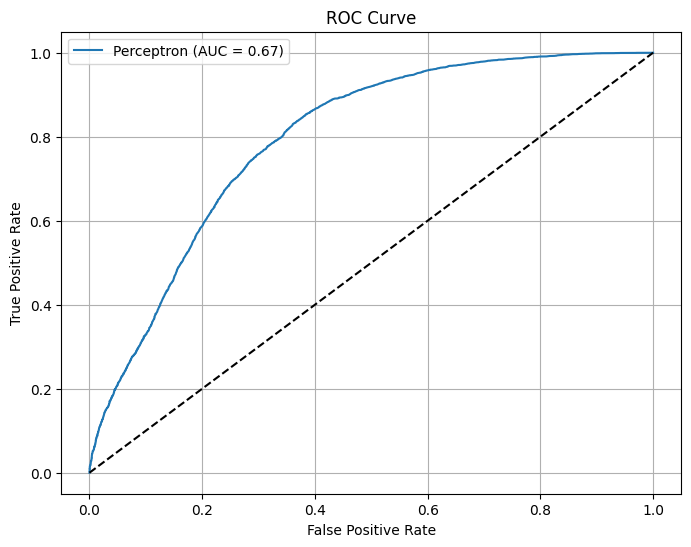

0.6738727332102581

In [5]:
from sklearn.linear_model import Perceptron
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
perceptron = Perceptron()

# Train the model
perceptron.fit(X_train, y_train)

# Make predictions on the test set
y_pred = perceptron.predict(X_test)

# Calculate the AUC
auc = roc_auc_score(y_test, y_pred)

# Compute ROC curve
fpr, tpr, _ = roc_curve(y_test, perceptron.decision_function(X_test))

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Perceptron (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.grid(True)
plt.show()

auc

# Question 2

In [9]:
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
from sklearn.metrics import roc_auc_score

# Function to create and compile the model
def create_model(n_layers, activation_function):
    model = models.Sequential()
    # Use a linear activation function if 'none' is specified
    activation = activation_function if activation_function != 'none' else 'linear'
    model.add(layers.Dense(10, activation=activation, input_shape=(X_train.shape[1],)))
    for _ in range(n_layers - 1):
        model.add(layers.Dense(10, activation=activation))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['AUC'])
    return model

# Parameters to test
activations = ['relu', 'sigmoid', 'none']  # Include 'none' for no activation
hidden_layers = [1, 2, 3]
results = []

# Training models with different configurations
for activation in activations:
    for n_layers in hidden_layers:
        model = create_model(n_layers, activation)
        history = model.fit(X_train, y_train, epochs = 3, batch_size= 32, verbose = 1, validation_data=(X_test, y_test))
        auc = history.history['val_auc'][-1]  # Get the last AUC value from the validation set
        results.append((activation, n_layers, auc))



Epoch 1/3
1768/1768 [==============================] - 15s 8ms/step - loss: 0.5933 - auc: 0.7689 - val_loss: 0.5489 - val_auc: 0.7989
Epoch 2/3
1768/1768 [==============================] - 13s 7ms/step - loss: 0.5412 - auc: 0.8020 - val_loss: 0.5400 - val_auc: 0.8074
Epoch 3/3
1768/1768 [==============================] - 14s 8ms/step - loss: 0.5361 - auc: 0.8059 - val_loss: 0.5339 - val_auc: 0.8078
Epoch 1/3
1768/1768 [==============================] - 16s 9ms/step - loss: 0.6250 - auc: 0.7353 - val_loss: 0.5494 - val_auc: 0.8017
Epoch 2/3
1768/1768 [==============================] - 15s 8ms/step - loss: 0.5421 - auc: 0.8012 - val_loss: 0.5376 - val_auc: 0.8047
Epoch 3/3
1768/1768 [==============================] - 14s 8ms/step - loss: 0.5387 - auc: 0.8041 - val_loss: 0.5369 - val_auc: 0.8112
Epoch 1/3
1768/1768 [==============================] - 15s 8ms/step - loss: 0.6598 - auc: 0.7385 - val_loss: 0.5496 - val_auc: 0.7956
Epoch 2/3
1768/1768 [==============================] - 14s 8ms

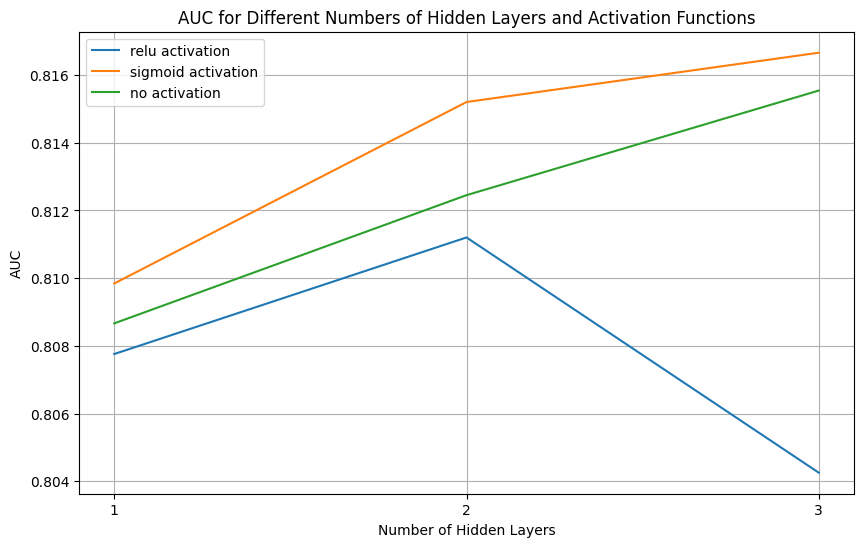

[('relu', 1, 0.8077573776245117), ('relu', 2, 0.8112016916275024), ('relu', 3, 0.8042502999305725), ('sigmoid', 1, 0.8098419904708862), ('sigmoid', 2, 0.8152035474777222), ('sigmoid', 3, 0.8166600465774536), ('none', 1, 0.8086638450622559), ('none', 2, 0.8124517202377319), ('none', 3, 0.8155426979064941)]


In [11]:
# Plotting the AUC for different configurations
plt.figure(figsize=(10, 6))
for activation in activations:
    auc_values = [result[2] for result in results if result[0] == activation]
    label = 'no activation' if activation == 'none' else f'{activation} activation'
    plt.plot(hidden_layers, auc_values, label=label)
plt.xticks(hidden_layers)
plt.xlabel('Number of Hidden Layers')
plt.ylabel('AUC')
plt.title('AUC for Different Numbers of Hidden Layers and Activation Functions')
plt.legend()
plt.grid()
plt.show()
print(results)

# Question 3

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv1D, MaxPooling1D
import numpy as np
import matplotlib.pyplot as plt

def create_deep_dnn(input_shape):
    model = Sequential()
    model.add(Dense(64, activation='relu', input_shape=input_shape))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['AUC'])
    return model


def create_cnn_for_structured_data(input_shape):
    model = Sequential()
    model.add(Conv1D(filters=64, kernel_size=1, activation='relu', input_shape=input_shape))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Conv1D(filters=32, kernel_size=1, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(16, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['AUC'])
    return model

# Prepare the input shape for the models
input_shape = (X_train.shape[1], )

# Create and train the deep DNN model
deep_dnn = create_deep_dnn(input_shape)
history_dnn = deep_dnn.fit(X_train, y_train, epochs= 10, batch_size=64, verbose=1, validation_data=(X_test, y_test))

# Create and train the CNN model for structured data
cnn = create_cnn_for_structured_data((X_train.shape[1], 1))
# Reshape data for CNN input
X_train_reshaped = X_train.values.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_reshaped = X_test.values.reshape(X_test.shape[0], X_test.shape[1], 1)
history_cnn = cnn.fit(X_train_reshaped, y_train, epochs= 10, batch_size=64, verbose=1, validation_data=(X_test_reshaped, y_test))

# Evaluate the models and compare their AUC
auc_deep_dnn = deep_dnn.evaluate(X_test, y_test, verbose=0)[1]
auc_cnn = cnn.evaluate(X_test_reshaped, y_test, verbose=0)[1]




Epoch 1/10
884/884 [==============================] - 8s 9ms/step - loss: 0.7305 - auc: 0.7211 - val_loss: 0.5643 - val_auc: 0.8024
Epoch 2/10
884/884 [==============================] - 7s 8ms/step - loss: 0.5616 - auc: 0.7873 - val_loss: 0.5737 - val_auc: 0.7822
Epoch 3/10
884/884 [==============================] - 7s 8ms/step - loss: 0.5762 - auc: 0.7820 - val_loss: 0.8224 - val_auc: 0.8093
Epoch 4/10
884/884 [==============================] - 7s 8ms/step - loss: 0.6168 - auc: 0.7667 - val_loss: 1.0394 - val_auc: 0.7216
Epoch 5/10
884/884 [==============================] - 7s 8ms/step - loss: 0.6397 - auc: 0.7628 - val_loss: 0.8006 - val_auc: 0.7632
Epoch 6/10
884/884 [==============================] - 7s 8ms/step - loss: 0.6761 - auc: 0.7550 - val_loss: 0.6348 - val_auc: 0.8037
Epoch 7/10
884/884 [==============================] - 7s 8ms/step - loss: 0.7758 - auc: 0.7421 - val_loss: 0.7980 - val_auc: 0.7790
Epoch 8/10
884/884 [==============================] - 7s 8ms/step - loss: 0.

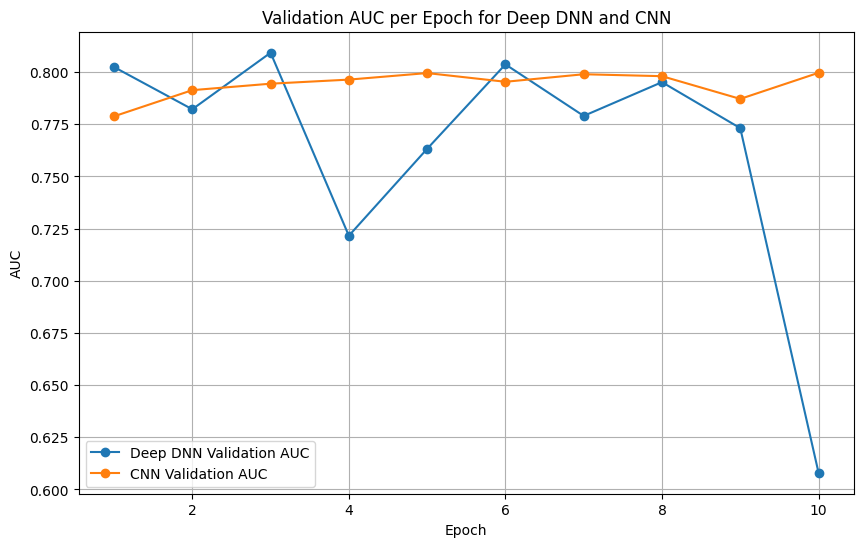

auc_per_epoch_dnn: [0.8024429082870483, 0.7821947932243347, 0.8092994689941406, 0.7215836644172668, 0.7632352113723755, 0.803708553314209, 0.779011607170105, 0.7951948642730713, 0.7731466889381409, 0.6080150604248047]
auc_per_epoch_cnn: [0.7788200974464417, 0.7913586497306824, 0.7944550514221191, 0.7964128255844116, 0.7995486855506897, 0.7953722476959229, 0.7989833950996399, 0.798058032989502, 0.7871646285057068, 0.7996829748153687]


In [18]:
auc_per_epoch_dnn = history_dnn.history['val_auc']
auc_per_epoch_cnn = history_cnn.history['val_auc']
epochs = range(1, len(auc_per_epoch_dnn) + 1)

# Plotting the AUC for each epoch
plt.figure(figsize=(10, 6))
plt.plot(epochs, auc_per_epoch_dnn, label='Deep DNN Validation AUC', marker='o')
plt.plot(epochs, auc_per_epoch_cnn, label='CNN Validation AUC', marker='o')
plt.xlabel('Epoch')
plt.ylabel('AUC')
plt.title('Validation AUC per Epoch for Deep DNN and CNN')
plt.legend()
plt.grid(True)
plt.show()

print("auc_per_epoch_dnn:", auc_per_epoch_dnn)
print("auc_per_epoch_cnn:", auc_per_epoch_cnn)

# Question 4

In [19]:
df = pd.read_csv('diabetes.csv')

majority = df[df.Diabetes == 0]
minority = df[df.Diabetes == 1]
majority_undersampled = resample(majority, replace = False, n_samples = len(minority),random_state = 13)
balanced_data = pd.concat([majority_undersampled, minority])

X_b = balanced_data.drop('BMI', axis = 1)
y_b = balanced_data['BMI']


X_train, X_test, y_train, y_test = train_test_split(X_b, y_b, test_size = 0.2, random_state = 13)

In [25]:
from tensorflow.keras import models, layers
from tensorflow.keras.optimizers import RMSprop
from sklearn.metrics import mean_squared_error
import tensorflow as tf

tf.random.set_seed(42)

model = models.Sequential()
model.add(layers.Dense(10, activation='relu', input_shape=(X_train.shape[1],)))
model.add(layers.Dense(1))

model.compile(optimizer=RMSprop(), loss='mean_squared_error')

# Fit the model
history = model.fit(X_train, y_train, epochs = 10, batch_size = 64, validation_data=(X_test, y_test))

# Predict BMI values on the test set
predicted_bmi = model.predict(X_test)

# Calculate RMSE
rmse = mean_squared_error(y_test, predicted_bmi, squared=False)
print(f'RMSE when using relu as activation: {rmse}')


Epoch 1/10
884/884 [==============================] - 5s 5ms/step - loss: 75.3259 - val_loss: 57.4807
Epoch 2/10
884/884 [==============================] - 4s 5ms/step - loss: 53.0797 - val_loss: 52.5933
Epoch 3/10
884/884 [==============================] - 4s 5ms/step - loss: 50.2562 - val_loss: 49.9221
Epoch 4/10
884/884 [==============================] - 4s 5ms/step - loss: 49.1170 - val_loss: 48.9371
Epoch 5/10
884/884 [==============================] - 4s 5ms/step - loss: 48.2084 - val_loss: 48.5916
Epoch 6/10
884/884 [==============================] - 4s 5ms/step - loss: 47.4687 - val_loss: 47.5631
Epoch 7/10
884/884 [==============================] - 4s 5ms/step - loss: 46.7740 - val_loss: 46.8028
Epoch 8/10
884/884 [==============================] - 4s 4ms/step - loss: 46.1295 - val_loss: 45.9731
Epoch 9/10
884/884 [==============================] - 4s 4ms/step - loss: 45.5454 - val_loss: 45.5837
Epoch 10/10
442/442 [==============================] - 1s 1ms/step
RMSE when using

/Users/alex_z/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [26]:
model = models.Sequential()
model.add(layers.Dense(10, activation='sigmoid', input_shape=(X_train.shape[1],)))
model.add(layers.Dense(1))

model.compile(optimizer=RMSprop(), loss='mean_squared_error')

# Fit the model
history = model.fit(X_train, y_train, epochs = 10, batch_size = 64, validation_data=(X_test, y_test))

# Predict BMI values on the test set
predicted_bmi = model.predict(X_test)

# Calculate RMSE
rmse = mean_squared_error(y_test, predicted_bmi, squared=False)
print(f'RMSE when using sigmoid as activation: {rmse}')

Epoch 1/10
884/884 [==============================] - 5s 5ms/step - loss: 655.5868 - val_loss: 466.5136
Epoch 2/10
884/884 [==============================] - 4s 5ms/step - loss: 315.6469 - val_loss: 172.9815
Epoch 3/10
884/884 [==============================] - 4s 4ms/step - loss: 96.6298 - val_loss: 54.3299
Epoch 4/10
884/884 [==============================] - 4s 5ms/step - loss: 50.8921 - val_loss: 51.2957
Epoch 5/10
884/884 [==============================] - 4s 5ms/step - loss: 49.3121 - val_loss: 49.3994
Epoch 6/10
884/884 [==============================] - 4s 5ms/step - loss: 47.2853 - val_loss: 46.6891
Epoch 7/10
884/884 [==============================] - 4s 5ms/step - loss: 45.1040 - val_loss: 44.8618
Epoch 8/10
884/884 [==============================] - 4s 5ms/step - loss: 43.7794 - val_loss: 43.6962
Epoch 9/10
884/884 [==============================] - 4s 5ms/step - loss: 42.7157 - val_loss: 42.5211
Epoch 10/10
442/442 [==============================] - 1s 1ms/step
RMSE when u

/Users/alex_z/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


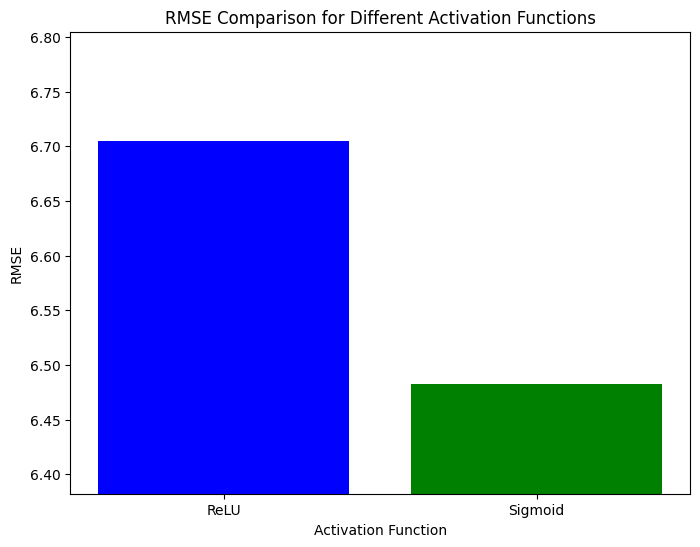

In [27]:
import matplotlib.pyplot as plt

# RMSE values from the provided results
rmse_relu = 6.704781658638995
rmse_sigmoid = 6.482103661166114

# Activation functions used
activations = ['ReLU', 'Sigmoid']

# Corresponding RMSE values
rmses = [rmse_relu, rmse_sigmoid]

# Plotting the RMSE comparison
plt.figure(figsize=(8, 6))
plt.bar(activations, rmses, color=['blue', 'green'])
plt.xlabel('Activation Function')
plt.ylabel('RMSE')
plt.title('RMSE Comparison for Different Activation Functions')
plt.ylim(min(rmses) - 0.1, max(rmses) + 0.1)  # Setting limits for better visualization
plt.show()


# Question 5

In [37]:
from tensorflow.keras import models, layers
from sklearn.metrics import mean_squared_error
from tensorflow.keras.optimizers import legacy

# Use the legacy Adam optimizer
Adam = legacy.Adam

# Create the baseline model
def create_baseline_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='sigmoid', input_shape=(X_train.shape[1],)))
    model.add(layers.Dense(32, activation='sigmoid'))
    model.add(layers.Dropout(0.2)) 
    model.add(layers.Dense(1)) 
    model.compile(optimizer=Adam(), loss='mean_squared_error')
    return model

# Train the baseline model
model = create_baseline_model()
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose = 1)

# Evaluate the baseline model
predicted_bmi = model.predict(X_test)
rmse = mean_squared_error(y_test, predicted_bmi, squared=False)
print(f'Baseline model RMSE: {rmse}')

Epoch 1/50
1414/1414 [==============================] - 7s 5ms/step - loss: 358.0218 - val_loss: 100.4700
Epoch 2/50
1414/1414 [==============================] - 6s 5ms/step - loss: 72.8023 - val_loss: 50.4892
Epoch 3/50
1414/1414 [==============================] - 7s 5ms/step - loss: 60.2666 - val_loss: 50.5700
Epoch 4/50
1414/1414 [==============================] - 6s 5ms/step - loss: 56.7828 - val_loss: 43.2187
Epoch 5/50
1414/1414 [==============================] - 7s 5ms/step - loss: 48.2553 - val_loss: 41.7058
Epoch 6/50
1414/1414 [==============================] - 7s 5ms/step - loss: 46.1334 - val_loss: 41.4628
Epoch 7/50
1414/1414 [==============================] - 6s 5ms/step - loss: 45.1065 - val_loss: 41.4853
Epoch 8/50
1414/1414 [==============================] - 7s 5ms/step - loss: 44.4302 - val_loss: 41.0075
Epoch 9/50
1414/1414 [==============================] - 7s 5ms/step - loss: 43.9010 - val_loss: 41.6688
Epoch 10/50
1414/1414 [==============================] - 7s 5m

/Users/alex_z/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [49]:
from tensorflow.keras import models, layers
from sklearn.metrics import mean_squared_error
from tensorflow.keras.optimizers import legacy

# Use the legacy Adam optimizer
Adam = legacy.Adam

# Create the baseline model
def create_baseline_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='sigmoid', input_shape=(X_train.shape[1],)))
    model.add(layers.Dense(32, activation='sigmoid'))
    model.add(layers.Dense(16, activation='sigmoid'))
    model.add(layers.Dense(8, activation='sigmoid'))
    #model.add(layers.Dropout(0.2)) 
    model.add(layers.Dense(1)) 
    model.compile(optimizer=Adam(), loss='mean_squared_error')
    return model

# Train the baseline model
model = create_baseline_model()
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2, verbose = 1)

# Evaluate the baseline model
predicted_bmi = model.predict(X_test)
rmse = mean_squared_error(y_test, predicted_bmi, squared=False)
print(f'Baseline model RMSE: {rmse}')

Epoch 1/20
1414/1414 [==============================] - 8s 6ms/step - loss: 530.9089 - val_loss: 316.6942
Epoch 2/20
1414/1414 [==============================] - 7s 5ms/step - loss: 201.9170 - val_loss: 117.5178
Epoch 3/20
1414/1414 [==============================] - 7s 5ms/step - loss: 80.3617 - val_loss: 57.7168
Epoch 4/20
1414/1414 [==============================] - 7s 5ms/step - loss: 52.8504 - val_loss: 50.6157
Epoch 5/20
1414/1414 [==============================] - 7s 5ms/step - loss: 50.7613 - val_loss: 50.4855
Epoch 6/20
1414/1414 [==============================] - 7s 5ms/step - loss: 50.7373 - val_loss: 50.4898
Epoch 7/20
1414/1414 [==============================] - 8s 5ms/step - loss: 50.7393 - val_loss: 50.4850
Epoch 8/20
1414/1414 [==============================] - 8s 6ms/step - loss: 50.7357 - val_loss: 50.4981
Epoch 9/20
1414/1414 [==============================] - 7s 5ms/step - loss: 50.7336 - val_loss: 50.5080
Epoch 10/20
1414/1414 [==============================] - 7s 

/Users/alex_z/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


# Question (a)

In [57]:
import numpy as np
from sklearn.metrics import mean_squared_error
def create_baseline_model(input_shape):
    model = models.Sequential()
    model.add(layers.Dense(64, activation='sigmoid', input_shape=input_shape))
    model.add(layers.Dense(32, activation='sigmoid'))
    model.add(layers.Dense(16, activation='sigmoid'))
    model.add(layers.Dense(8, activation='sigmoid'))
    # model.add(layers.Dropout(0.2)) 
    model.add(layers.Dense(1)) 
    model.compile(optimizer=Adam(), loss='mean_squared_error')
    return model

original_predictions = model.predict(X_test)
original_rmse = np.sqrt(mean_squared_error(y_test, original_predictions))

feature_impact = {}
for feature in X_train.columns:
    # Create a copy of the dataset without the current feature
    X_train_reduced = X_train.drop(columns=[feature])
    X_test_reduced = X_test.drop(columns=[feature])
    
    # Re-instantiate and recompile the model with the new input shape
    input_shape = (X_train_reduced.shape[1],)  # Update the input shape
    model_reduced = create_baseline_model(input_shape)  # Assuming your model creation function can take input shape as an argument
    
    # Retrain the model and calculate RMSE
    model_reduced.fit(X_train_reduced, y_train, epochs=5, batch_size=32, verbose = 1)
    predicted_bmi_reduced = model_reduced.predict(X_test_reduced)
    rmse_reduced = np.sqrt(mean_squared_error(y_test, predicted_bmi_reduced))
    
    # Store the change in RMSE
    feature_impact[feature] = abs(original_rmse - rmse_reduced)



442/442 [==============================] - 1s 2ms/step
Epoch 1/5
1768/1768 [==============================] - 8s 5ms/step - loss: 502.3070
Epoch 2/5
1768/1768 [==============================] - 8s 4ms/step - loss: 144.5118
Epoch 3/5
1768/1768 [==============================] - 8s 5ms/step - loss: 58.2718
Epoch 4/5
1768/1768 [==============================] - 8s 5ms/step - loss: 50.7518
Epoch 5/5
442/442 [==============================] - 1s 2ms/step
Epoch 1/5
1768/1768 [==============================] - 9s 5ms/step - loss: 566.8900
Epoch 2/5
1768/1768 [==============================] - 9s 5ms/step - loss: 167.5781
Epoch 3/5
1768/1768 [==============================] - 9s 5ms/step - loss: 61.9526
Epoch 4/5
1768/1768 [==============================] - 9s 5ms/step - loss: 50.8325
Epoch 5/5
442/442 [==============================] - 1s 2ms/step
Epoch 1/5
1768/1768 [==============================] - 9s 5ms/step - loss: 660.5775
Epoch 2/5
1768/1768 [==============================] - 8s 5ms/s

In [58]:
print(feature_impact)

{'Diabetes': 0.8004799681292196, 'HighBP': 0.8004903615489543, 'HighChol': 0.8007760814404472, 'Smoker': 0.8005368708698581, 'Stroke': 0.8005399310131347, 'Myocardial': 0.8004864796429851, 'PhysActivity': 0.8004881747394057, 'Fruit': 0.8005520830761181, 'Vegetables': 1.0688479763439602, 'HeavyDrinker': 0.800534297059678, 'HasHealthcare': 0.8005517560752411, 'NotAbleToAffordDoctor': 0.8004853722220266, 'GeneralHealth': 0.8004952135783228, 'MentalHealth': 0.42447223804991907, 'PhysicalHealth': 0.8005334582228034, 'HardToClimbStairs': 0.8005508418631466, 'BiologicalSex': 0.8006217968135703, 'AgeBracket': 0.8004776353094814, 'EducationBracket': 0.8007372819675549, 'IncomeBracket': 0.8004891304484607, 'Zodiac': 0.8004953349143271}


In [59]:
threshold = 0.8  # Define a threshold for change in RMSE to consider insignificant
insignificant_features = [feature for feature, impact in feature_impact.items() if impact < threshold]

print("Features with minimal impact on model accuracy:", insignificant_features)

Features with minimal impact on model accuracy: ['MentalHealth']


# Question (b)